# Nivel 1

## Ejercicio 1

### *Coge un conjunto de datos de tema deportivo que te guste. Realiza un muestreo de los datos generando una muestra aleatoria simple y una muestra sistematica*

In [1]:
import numpy as np
import pandas as pd
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# base de datos extraida de kaggle.com sobre lesiones en la NBA entre los años 2010 y 2020
injuries_df = pd.read_csv('injuries_2010-2020.csv')
injuries_df

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


In [3]:
injuries_df.describe()

,Date,Team,Acquired,Relinquished,Notes
count,27105,27103,9542,17560,27105
unique,2103,32,1111,1156,3114
top,2014-04-16,Spurs,Dwyane Wade,Kevin Love,activated from IL
freq,76,1163,54,101,7342


In [4]:
# trabajaremos sobre la cantidad de lesiones por año
# crearemos una columa 'Year'
injuries_df['Date'] = pd.to_datetime(injuries_df['Date'], errors='coerce')
injuries_df['Year'] = injuries_df['Date'].dt.year 
injuries_df

,Date,Team,Acquired,Relinquished,Notes,Year
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020


In [5]:
# muestra aleatoria simple
simple_df = injuries_df.sample(100)
simple_df

,Date,Team,Acquired,Relinquished,Notes,Year
25083,2019-11-12,Nets,NaN,Caris LeVert,placed on IL with right thumb injury (surgery),2019
16802,2016-12-17,Cavaliers,NaN,Chris Andersen,placed on IL with torn ACL in right knee,2016
8439,2013-12-23,Spurs,NaN,Cory Joseph,placed on IL with stomach virus,2013
12915,2015-04-20,Pelicans,NaN,Jrue Holiday,stress reaction in lower right leg (DTD),2015
12769,2015-04-10,Thunder,Nick Collison,NaN,activated from IL,2015
...,...,...,...,...,...,...
2641,2011-12-25,Hawks,NaN,Kirk Hinrich,surgery on left shoulder (out indefinitely),2011
1030,2011-01-05,Bobcats,NaN,Stephen Jackson,hyperextended left knee (DNP),2011
11242,2014-12-22,Kings,Omri Casspi,NaN,activated from IL,2014
6037,2013-01-13,Nuggets,NaN,Julyan Stone,placed on IL,2013


In [6]:
simple_df.describe()

,Year
count,100.000000
mean,2014.930000
std,2.825765
min,2010.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2020.000000


In [7]:
simple_df['Year'].value_counts().sort_index(ascending=True)

2010     3
2011     9
2012    14
2013     7
2014    14
2015    14
2016     7
2017    10
2018     7
2019     9
2020     6
Name: Year, dtype: int64

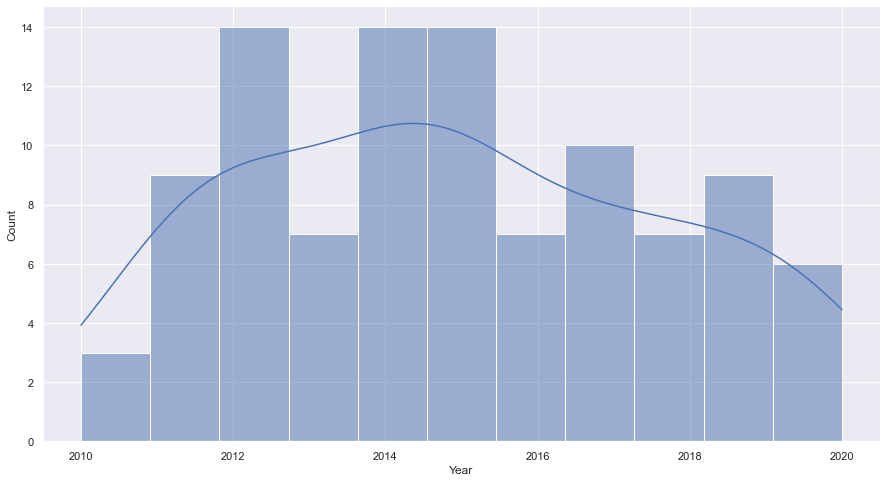

In [8]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=simple_df, x='Year', kde=True, bins=11)
plt.show()

In [9]:
# muestra sistematica
# el punto de partida lo definiremos de manera random
ini = np.random.randint(1, 50)
ini

44

In [10]:
step = 84
sistem_df = injuries_df[ini:len(injuries_df):step]
sistem_df

,Date,Team,Acquired,Relinquished,Notes,Year
44,2010-10-27,Cavaliers,NaN,Mo Williams,placed on IL with groin injury,2010
128,2010-10-30,Rockets,Yao Ming,NaN,activated from IL,2010
212,2010-11-07,Rockets,NaN,Aaron Brooks,placed on IL with sprained left ankle,2010
296,2010-11-13,Heat,NaN,Jamaal Magloire,placed on IL,2010
380,2010-11-19,Warriors,NaN,Brandan Wright,strained lower back (DNP),2010
...,...,...,...,...,...,...
26756,2020-07-09,Wizards,NaN,NaN,COVID-19 coronavirus (out indefinitely),2020
26840,2020-08-03,Heat,K.Z. Okpala,NaN,activated from IL,2020
26924,2020-08-10,Lakers,Danny Green,NaN,activated from IL,2020
27008,2020-08-13,Wizards,NaN,Rui Hachimura,right quadricep injury (out for season),2020


In [11]:
sistem_df.describe()

,Year
count,323.000000
mean,2015.201238
std,2.777415
min,2010.000000
25%,2013.000000
50%,2015.000000
75%,2017.000000
max,2020.000000


In [12]:
sistem_df['Year'].value_counts().sort_index(ascending=True)

2010    12
2011    20
2012    38
2013    32
2014    33
2015    33
2016    35
2017    40
2018    35
2019    29
2020    16
Name: Year, dtype: int64

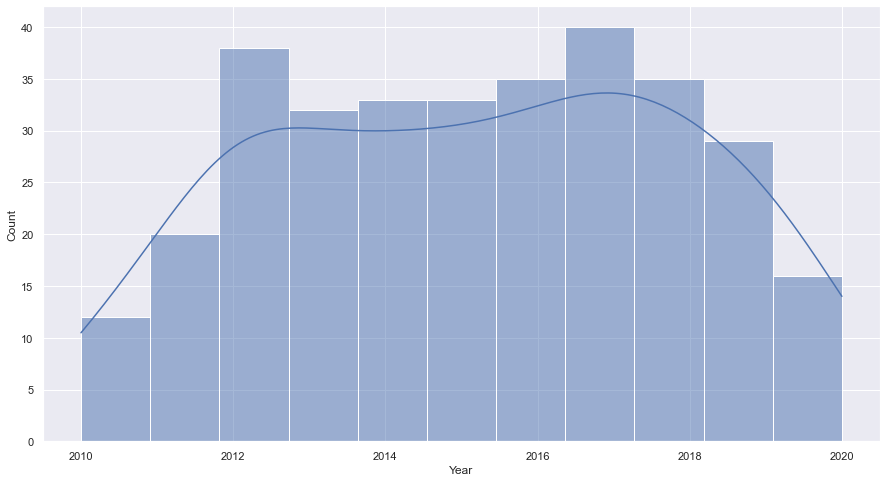

In [13]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=sistem_df, x='Year', kde=True, bins=11)
plt.show()

# Nivel 2

## Ejercicio 2

### *Continua con el conjkunto de datos de tema deportivo y genera una muestra estratificada y una muestra utilizando SMOTE (Synthetic Minority Oversampling Technique)*

In [14]:
# muestra estratificada 
injuries_df.isna().sum()

Date                0
Team                2
Acquired        17563
Relinquished     9545
Notes               0
Year                0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(injuries_df, test_size=0.20, stratify=injuries_df[['Year']])
Xtrain

,Date,Team,Acquired,Relinquished,Notes,Year
10813,2014-11-21,Raptors,Bruno Caboclo,NaN,activated from IL,2014
2049,2011-03-19,Clippers,Eric Gordon,NaN,activated from IL,2011
19006,2017-10-17,Cavaliers,NaN,John Holland,placed on IL,2017
13434,2015-11-18,Pelicans,NaN,Jrue Holiday,DNP,2015
24747,2019-04-19,Raptors,NaN,Chris Boucher,placed on IL with back spasms,2019
...,...,...,...,...,...,...
23830,2019-02-05,Cavaliers,NaN,Nik Stauskas,placed on IL with sore left knee,2019
4414,2012-04-03,Knicks,NaN,Jeremy Lin,recovering from surgery on left knee to repair...,2012
26719,2020-03-10,Warriors,Ky Bowman,NaN,activated from IL,2020
17925,2017-02-27,Celtics,Avery Bradley,NaN,activated from IL,2017
